In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.fftpack

import scipy.io.wavfile
import scipy.linalg

# 1 Discrete Cosine Transform (DCT)

# a)

In [204]:
def basis_vector(N,k):
    
    a_k = np.arange(N, dtype='float')

    ck = np.sqrt(2/N)
    if(k == 0): ck = np.sqrt(1/N)
    for nn in range(N):
        a_k[nn] = ck * np.cos( (np.pi / (2 * N))  * k * (2*nn+1) )

    return a_k


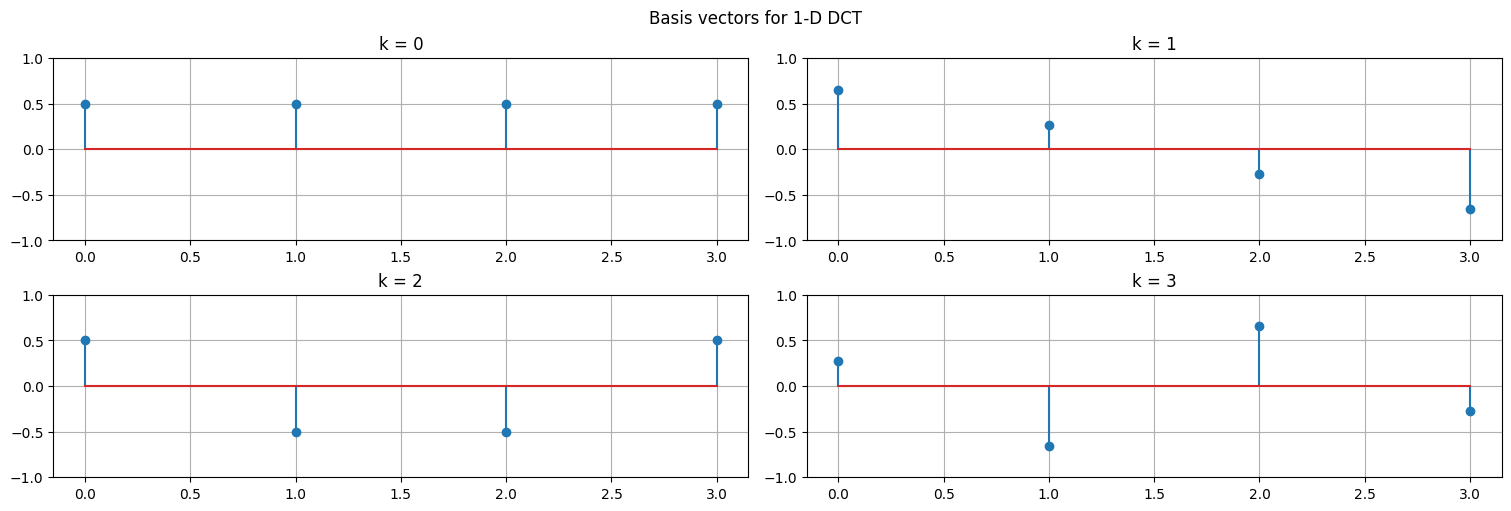

In [205]:
# Plot for N = 4
N = 4

fig, ax = plt.subplots(2, 2, figsize=(15, 5), constrained_layout=True)
fig.suptitle("Basis vectors for 1-D DCT")

for k in range(N):
    ax[int(k/2)][k%2].set_title("k = "+str(k))
    ax[int(k/2)][k%2].stem(basis_vector(N,k))
    ax[int(k/2)][k%2].set_ylim([-1, 1])
    ax[int(k/2)][k%2].grid()


# b)

In [206]:
def basis_image(N):
    A_BI = np.empty((N**2, N**2))
    for k in range(N):
        ak = basis_vector(N,k)
        for l in range(N):
            al = basis_vector(N,l)
            aKL = np.outer(ak,al)
            for x in range(N):
                for y in range(N):
                    A_BI[k * N + x][l * N + y] = aKL[x][y] #filling every 4x4 block left to right, top to bottom
    return A_BI # Combinations of the basis vectors on x and y

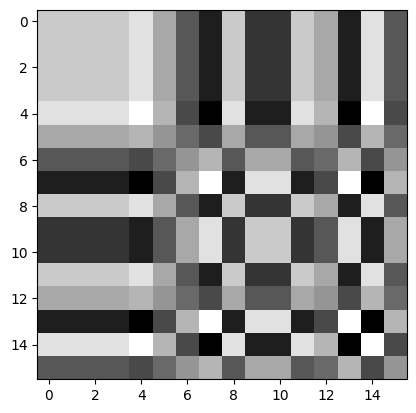

In [207]:
N = 4
A_BI = basis_image(N)

plt.imshow(A_BI, cmap='gray')

left top and left bottom, is where k = 0 for aK, there is no oscillation for the aK part    
top left and top right, k = 0 for aL    
top left => no oscillation in both directions   
bottom left => osillation k = 3 for aK  
top right => oscillation k = 3 for aL   
bottom right => both are osillating at k = 3, which gives it the checkerboard-ish-like look 

# c)

In [208]:
def dct_mat(N):
    A_DCT = np.empty((N, N))
    for k in range(N):
        bv = basis_vector(N, k)
        for n in range(N):
            A_DCT[k][n] = bv[n]

    return A_DCT # DCT matrix to be applied to one Block

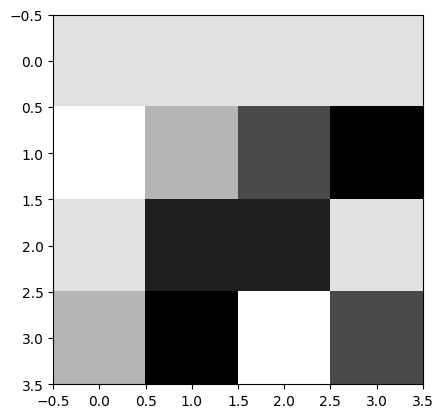

In [209]:
N = 4
A_DCT = dct_mat(N)

plt.imshow(A_DCT, cmap='gray')

# d)

In [210]:
def block_dct2(X,N):
    xPixel = X.shape[0]
    yPixel = X.shape[1]
    
    xBlocks = int(xPixel/N)
    yBlocks = int(yPixel/N)

    X_block = np.empty((xBlocks, yBlocks, N, N)) #X here for input
    Y_block = np.empty((xBlocks, yBlocks, N, N)) #Y here for output
    Y = np.empty((xPixel, yPixel)) # Y output image

    # X_Blocks
    for xBlockCursor in range(xBlocks):
        for yBlockCursor in range(yBlocks):
            block = np.empty((N,N))
            for x in range(N):
                for y in range(N):
                    X_block[xBlockCursor][yBlockCursor][x][y] = X[xBlockCursor * N + x][yBlockCursor * N + y]
            
    # Y_Blocks
    A_DCT = dct_mat(N)
    for x in range(xBlocks):
        for y in range(yBlocks):
            Y_block[x][y] = np.dot(A_DCT, np.dot(X_block[x][y], A_DCT.T))
    
    # Y
    for xBlockCursor in range(xBlocks):
        for yBlockCursor in range(yBlocks):
            for x in range(N):
                for y in range(N):
                    Y[xBlockCursor * N + x][yBlockCursor * N + y] = Y_block[xBlockCursor][yBlockCursor][x][y]


    return X_block, Y_block, Y

# e)

Solution if M/N is no int:  
- Adding Pixels so that M/N is int
    - (Filling the remaining pixels with similar values to their neighbours)
- Cutting off the image, so that M/N becomes an int (losing information)

# test

[[241  -9  -1   0]
 [ -3  -2   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]


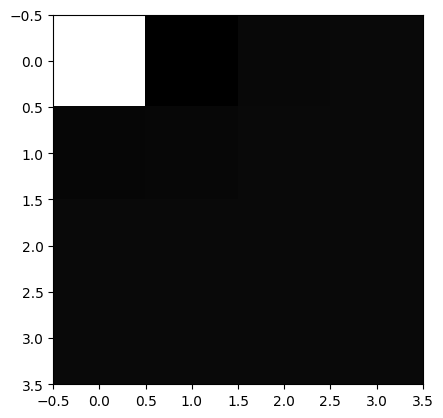

In [211]:
test = np.dot(A_DCT, np.dot(block_dct2(img,4)[0][0][0], A_DCT.T))
test = test.astype('int')
print(test)
plt.imshow(test, cmap='gray')

# f)

In [212]:
img = mpimg.imread('christoph512.jpg')

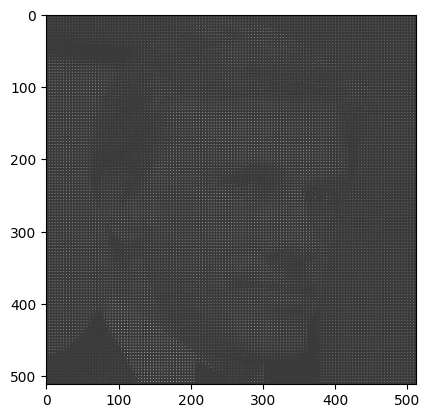

In [213]:
N = 4
X_block, Y_block, Y = block_dct2(img,N)
plt.imshow(Y, cmap='gray')
# DCT blocks reconstructed: lucky if the picture makes sense
# Description of intensities of Basis-Image Elements

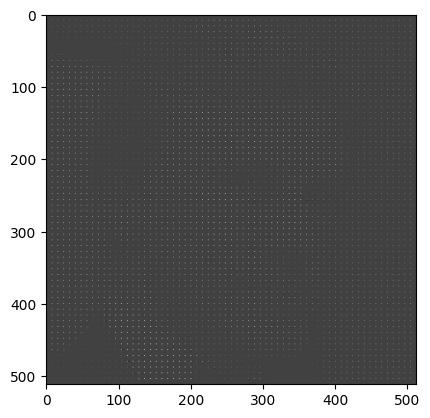

In [214]:
N = 8
X_block, Y_block, Y = block_dct2(img,N)
plt.imshow(Y, cmap='gray')

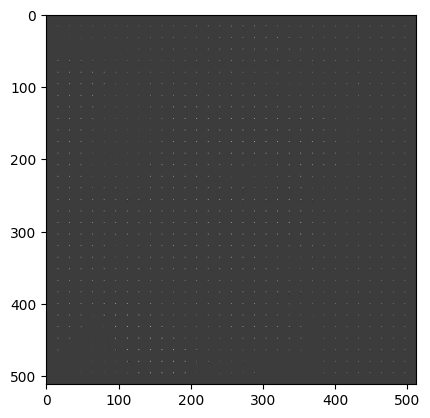

In [215]:
N = 16
X_block, Y_block, Y = block_dct2(img,N)
plt.imshow(Y, cmap='gray')

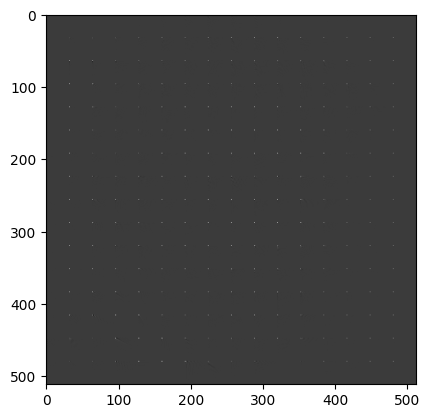

In [216]:
N = 32
X_block, Y_block, Y = block_dct2(img,N)
plt.imshow(Y, cmap='gray')

# g)
apperantly double question i)

# h)

In [217]:
def reorder(Y, N): # Putting every same Basis-Image element of every Block together
    xPixel = Y.shape[0]
    yPixel = Y.shape[1]
    
    xBlocks = int(xPixel/N)
    yBlocks = int(yPixel/N)

    Y_reorder = np.empty((xPixel, yPixel))

    for nx in range(N): # iterating through the index of the block
        for ny in range(N):
            for x in range(xBlocks): # iterating through the blocks
                for y in range(yBlocks):
                        Y_reorder[x + nx*xBlocks][y + ny*yBlocks] = Y[x*N + nx][y*N + ny]
                        # setting the reordered blocks one by one


    return Y_reorder

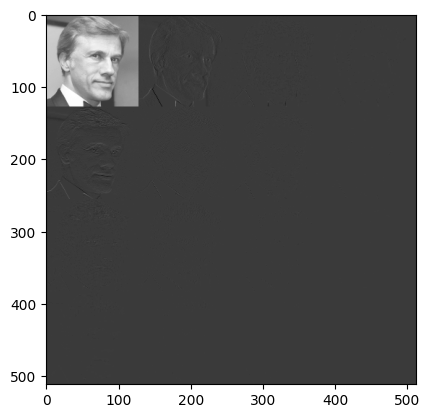

In [218]:
N = 4
X_block, Y_block, Y = block_dct2(img,N)
Y_reorder = reorder(Y, N)
plt.imshow(Y_reorder, cmap='gray')

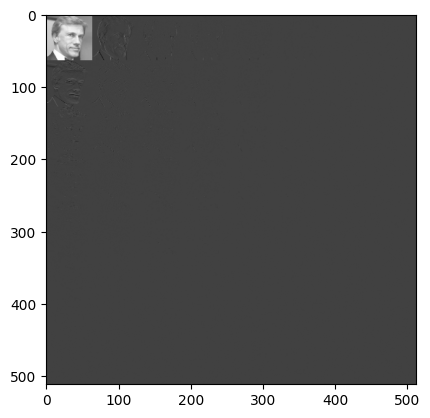

In [219]:
N = 8
X_block, Y_block, Y = block_dct2(img,N)
Y_reorder = reorder(Y, N)
plt.imshow(Y_reorder, cmap='gray')

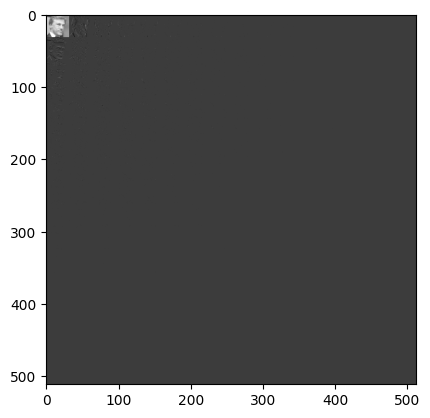

In [220]:
N = 16
X_block, Y_block, Y = block_dct2(img,N)
Y_reorder = reorder(Y, N)
plt.imshow(Y_reorder, cmap='gray')

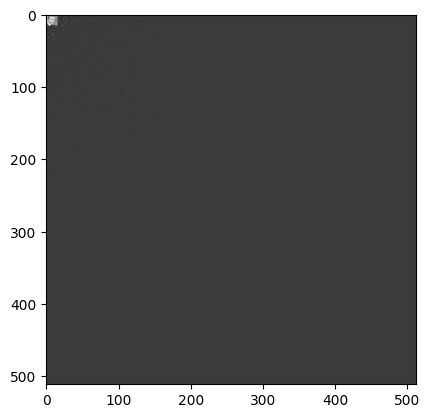

In [221]:
N = 32
X_block, Y_block, Y = block_dct2(img,N)
Y_reorder = reorder(Y, N)
plt.imshow(Y_reorder, cmap='gray')

# i)

On the top left there is the smaller version:
because, in the 2D-DCT Transfrom/Compression, the top left Pixel in the blocks is generally the most weighted block, and contains the most important intensity value for the whole block. The other values in the block give information about the frequencies of the intensity-changes in the picture, but the top left pixel always has the information of the general intensity of the block.
Therefore, as we are putting all "top-left-pixels" of all blocks to the top-left by reordering, we simply put all of the most important pixels to this top left section, which gives us more or less the original image there.

# j)

The Zig Zag Scheme vectorizes a block, such that the top left elements come first in the vector/array, and the bottom right ones last. With that, the more "important" and more "decisive" elements of the block are put first in the vector, that espacially have a high weighting in the compression, as they make a lot more for the human conception of the image.
The top left elements usally have higher values, and are less often affected by the compression threshholds.
This concludes, that the tailing elements of the vector, are just a lot of zeroes. And a sequence of zeroes are very easy to compress.

# k)

The blockwise DCT has approximately (M^2 / N^2) times more the computation needed than a whole-image 2D-DCT.

# l)

In [222]:
def threshhold(Y, r):
    xPixel = Y.shape[0]
    yPixel = Y.shape[1]

    Y_threshold = np.empty((xPixel, yPixel))

    threshhold = r * np.max(np.abs(Y))

    for x in range(xPixel):
        for y in range(yPixel):
            if np.abs(Y[x][y]) <= threshhold:   Y_threshold[x][y] = 0
            else:                               Y_threshold[x][y] = Y[x][y]


    return Y_threshold

Advantage of thresholding vs. masking:  
The masking method just scrapes all data from a given point, not considering the importance or real effect on the final image, whereas the thresholding method tries to aim to keep just the important and decisive values, which really make the difference in the final image, and scrape all non-effective and unimportand values.
This is because in the DCT-Image-Values, the higher the value, the more effect it has in the image.

# test

In [223]:
Y_threshold = threshhold(Y, 0.3)
Y_threshold

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

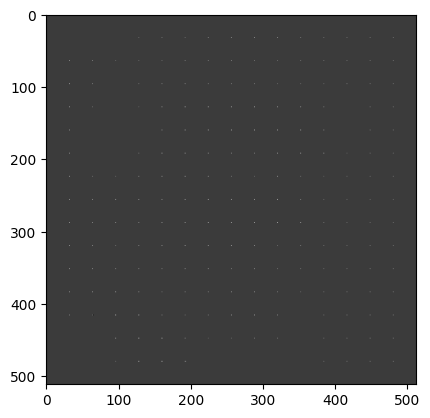

In [224]:
plt.imshow(Y_threshold, cmap='gray')

# m)

In [225]:
def reconstruct(Y_threshold, N):

    xPixel = Y_threshold.shape[0]
    yPixel = Y_threshold.shape[1]
    xBlocks = int(xPixel/N)
    yBlocks = int(yPixel/N)

    X_reconstructed = np.empty((xPixel, yPixel))

    blocked_Y = np.empty((xBlocks, yBlocks, N, N))
    blocked_X = np.empty((xBlocks, yBlocks, N, N))

    # constructing Blocked Y
    for xBlockCursor in range(xBlocks):
        for yBlockCursor in range(yBlocks):
            for x in range(N):
                for y in range(N):
                    blocked_Y[xBlockCursor][yBlockCursor][x][y] = Y_threshold[xBlockCursor * N + x][yBlockCursor * N + y]
            
    # iDCT on Y blocks
    for xBlockCursor in range(xBlocks):
        for yBlockCursor in range(yBlocks):

            blocked_X[xBlockCursor][yBlockCursor] = scipy.fftpack.idct( blocked_Y[xBlockCursor][yBlockCursor] , axis = 0)
            blocked_X[xBlockCursor][yBlockCursor] = scipy.fftpack.idct( blocked_X[xBlockCursor][yBlockCursor] , axis = 1)
            
    
    # X_reconstructed out of blocked X
    for xBlockCursor in range(xBlocks):
        for yBlockCursor in range(yBlocks):
            for x in range(N):
                for y in range(N):
                    X_reconstructed[xBlockCursor * N + x][yBlockCursor * N + y] = blocked_X[xBlockCursor][yBlockCursor][x][y]

    
    return X_reconstructed

# n)

In [38]:
def PSNR(X, X_reconstructed):
    M = X.shape[0]

    ratio = 255/np.max(X_reconstructed)
    X_reconstructed255 = X_reconstructed*ratio

    value = 0
    for i in range(M):
        for j in range(M):
            value += (X[i][j] - X_reconstructed[i][j])**2

    MSE = (1 / M**2) * value

    PSNR = 10 * np.log10(255**2/MSE)

    return PSNR

# o)

Observations:
- Seeking to keep image-quality:
- The bigger the blocks, the less forgiving is the compression, as the intensity data for individual points are lost and solely depend on the frequency components of the DCT
- The smaller the blocks, more blocks have to be stored but it allows for a higher compression rate, as more individual points exist for determining intensities of blocks
- e.g. with a whole-image DCT, a minimal compression leads to an almost completely unrecognizable image

Disadvantages of blockwise DCT compared to whole-image DCT:
- The whole image DCT seems to keep more of the original color/value-intensities, as the blockwise ones seem to be washed out
- Blockwise DCT requires more data-storage, as, theoretically, more data is preserved

In [227]:
img = mpimg.imread('christoph512.jpg')

Original:

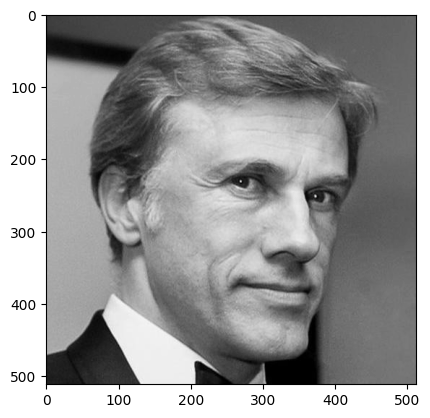

In [228]:
plt.imshow(img, cmap='gray')

N = 4   
r = 0.01       
 
q = -4.27

-4.2659061146659365

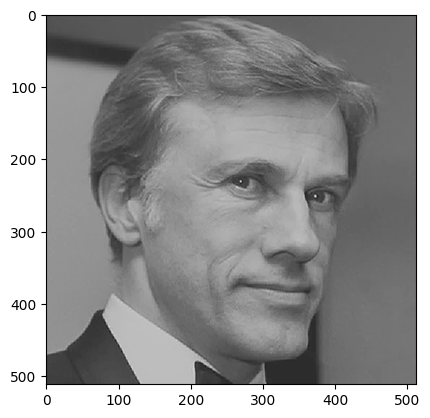

In [229]:
N = 4
r = 0.01

X_block, Y_block, Y = block_dct2(img, N)
Y_threshold = threshhold(Y, r)
X_reconstructed = reconstruct(Y_threshold, N)
plt.imshow(X_reconstructed, cmap='gray')
PSNR(img, X_reconstructed)

N = 8   
r = 0.01       
 
q = -11.65

-11.651506616541706

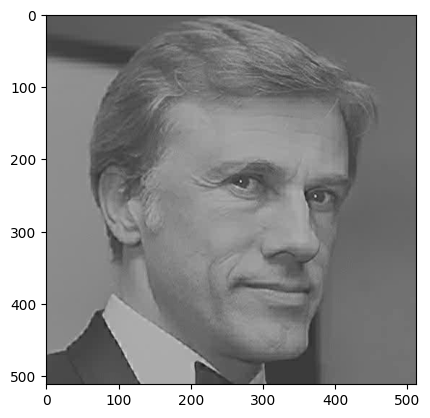

In [230]:
N = 8
r = 0.01

X_block, Y_block, Y = block_dct2(img, N)
Y_threshold = threshhold(Y, r)
X_reconstructed = reconstruct(Y_threshold, N)
plt.imshow(X_reconstructed, cmap='gray')
PSNR(img, X_reconstructed)

N = 16   
r = 0.01       
 
q = -18.31

-18.31903492407227

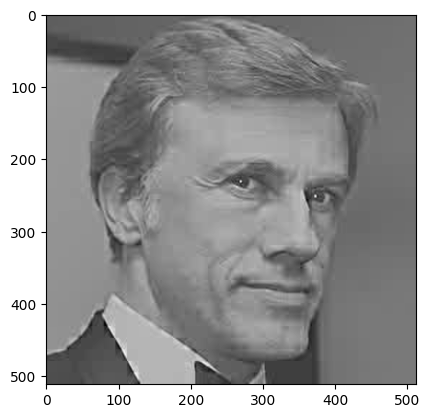

In [231]:
N = 16
r = 0.01

X_block, Y_block, Y = block_dct2(img, N)
Y_threshold = threshhold(Y, r)
X_reconstructed = reconstruct(Y_threshold, N)
plt.imshow(X_reconstructed, cmap='gray')
PSNR(img, X_reconstructed)

N = 32  
r = 0.01       
 
q = -24.73

-24.72717743946449

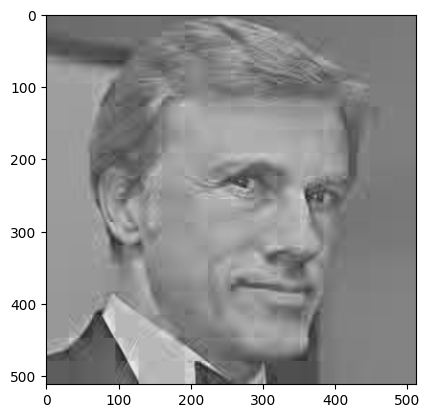

In [232]:
N = 32
r = 0.01

X_block, Y_block, Y = block_dct2(img, N)
Y_threshold = threshhold(Y, r)
X_reconstructed = reconstruct(Y_threshold, N)
plt.imshow(X_reconstructed, cmap='gray')
PSNR(img, X_reconstructed)

N = 64   
r = 0.01       
 
q = -31.04

-31.04234431091036

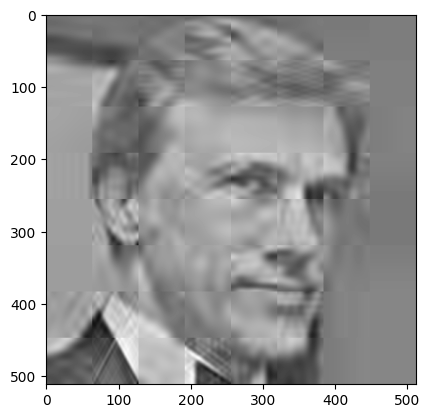

In [233]:
N = 64
r = 0.01

X_block, Y_block, Y = block_dct2(img, N)
Y_threshold = threshhold(Y, r)
X_reconstructed = reconstruct(Y_threshold, N)
plt.imshow(X_reconstructed, cmap='gray')
PSNR(img, X_reconstructed)

N = 4  
r = 0.1       
 
q = -4.23

-4.238844698403826

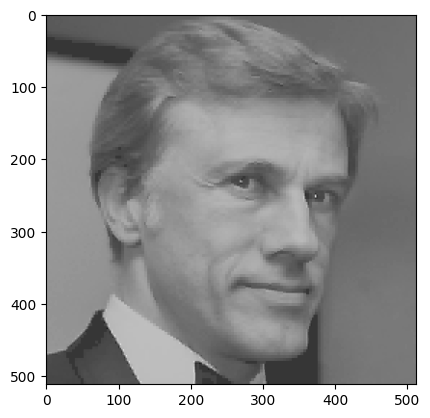

In [234]:
N = 4
r = 0.1

X_block, Y_block, Y = block_dct2(img, N)
Y_threshold = threshhold(Y, r)
X_reconstructed = reconstruct(Y_threshold, N)
plt.imshow(X_reconstructed, cmap='gray')
PSNR(img, X_reconstructed)

N = 8   
r = 0.1       
 
q = -11.59

-11.593317843695159

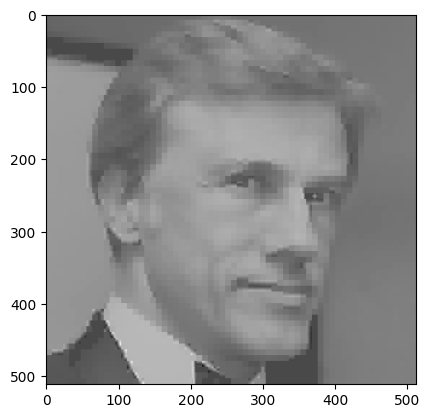

In [235]:
N = 8
r = 0.1

X_block, Y_block, Y = block_dct2(img, N)
Y_threshold = threshhold(Y, r)
X_reconstructed = reconstruct(Y_threshold, N)
plt.imshow(X_reconstructed, cmap='gray')
PSNR(img, X_reconstructed)

N = 16  
r = 0.1       
 
q = -18.21

-18.207548845518716

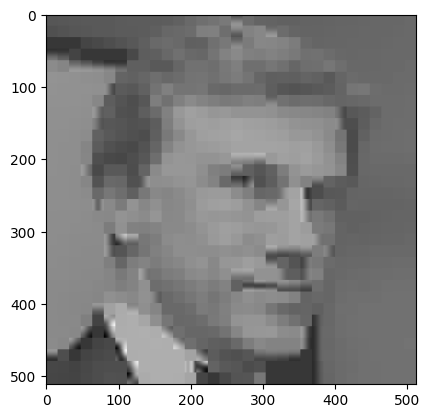

In [236]:
N = 16
r = 0.1

X_block, Y_block, Y = block_dct2(img, N)
Y_threshold = threshhold(Y, r)
X_reconstructed = reconstruct(Y_threshold, N)
plt.imshow(X_reconstructed, cmap='gray')
PSNR(img, X_reconstructed)

N = 32  
r = 0.1       
 
q = -24.52

-24.5175769566317

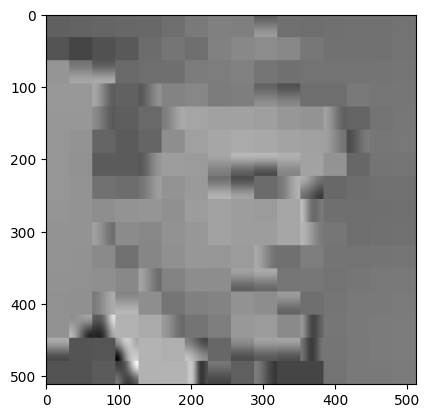

In [237]:
N = 32
r = 0.1

X_block, Y_block, Y = block_dct2(img, N)
Y_threshold = threshhold(Y, r)
X_reconstructed = reconstruct(Y_threshold, N)
plt.imshow(X_reconstructed, cmap='gray')
PSNR(img, X_reconstructed)

N = 64   
r = 0.1       
 
q = -30.68

-30.67990553905309

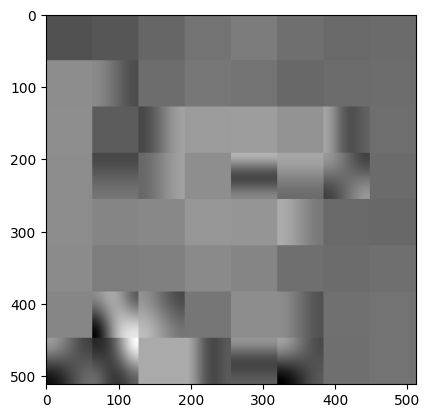

In [238]:
N = 64
r = 0.1

X_block, Y_block, Y = block_dct2(img, N)
Y_threshold = threshhold(Y, r)
X_reconstructed = reconstruct(Y_threshold, N)
plt.imshow(X_reconstructed, cmap='gray')
PSNR(img, X_reconstructed)

N = 4   
r = 0.3       
 
q = -4.16

-4.160096786975109

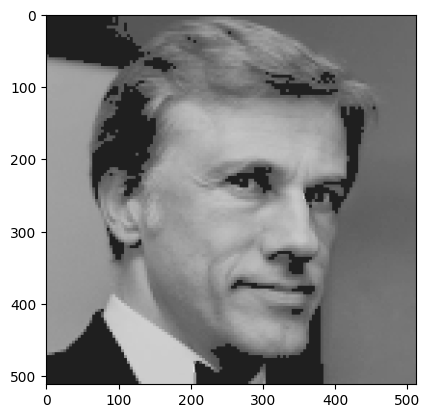

In [239]:
N = 4
r = 0.3

X_block, Y_block, Y = block_dct2(img, N)
Y_threshold = threshhold(Y, r)
X_reconstructed = reconstruct(Y_threshold, N)
plt.imshow(X_reconstructed, cmap='gray')
PSNR(img, X_reconstructed)

N = 8   
r = 0.3       
 
q = -11.49

-11.491538026900344

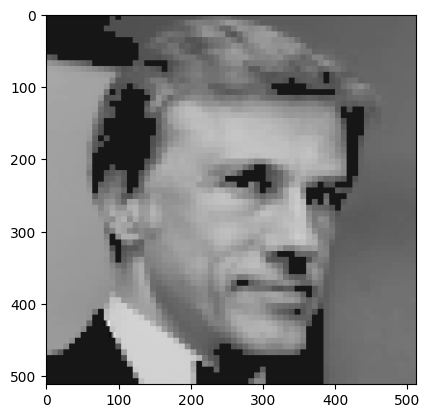

In [240]:
N = 8
r = 0.3

X_block, Y_block, Y = block_dct2(img, N)
Y_threshold = threshhold(Y, r)
X_reconstructed = reconstruct(Y_threshold, N)
plt.imshow(X_reconstructed, cmap='gray')
PSNR(img, X_reconstructed)

N = 16   
r = 0.3       
 
q = -18.07

-18.072875674320457

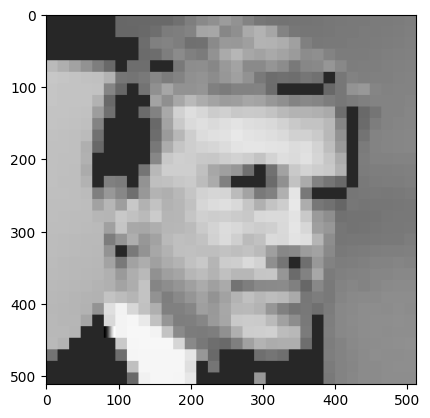

In [241]:
N = 16
r = 0.3

X_block, Y_block, Y = block_dct2(img, N)
Y_threshold = threshhold(Y, r)
X_reconstructed = reconstruct(Y_threshold, N)
plt.imshow(X_reconstructed, cmap='gray')
PSNR(img, X_reconstructed)

N = 32   
r = 0.3       
 
q = -24.32

-24.32100102201153

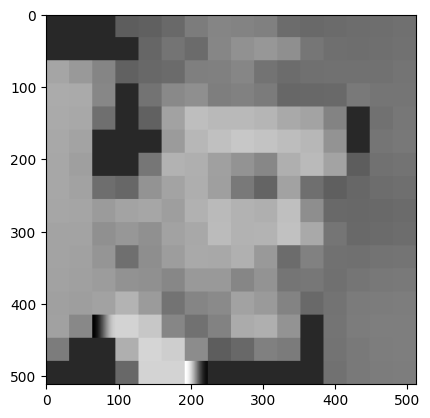

In [242]:
N = 32
r = 0.3

X_block, Y_block, Y = block_dct2(img, N)
Y_threshold = threshhold(Y, r)
X_reconstructed = reconstruct(Y_threshold, N)
plt.imshow(X_reconstructed, cmap='gray')
PSNR(img, X_reconstructed)

N = 64  
r = 0.3       
 
q = -30.34

-30.336615684635216

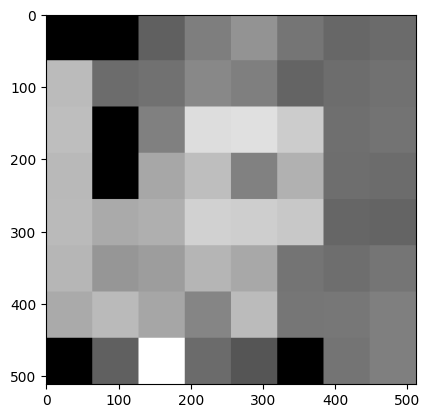

In [243]:
N = 64
r = 0.3

X_block, Y_block, Y = block_dct2(img, N)
Y_threshold = threshhold(Y, r)
X_reconstructed = reconstruct(Y_threshold, N)
plt.imshow(X_reconstructed, cmap='gray')
PSNR(img, X_reconstructed)

# test orig vs whole image dct

-50.246050011014766

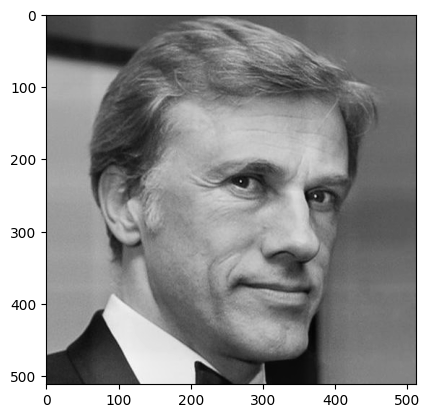

In [244]:
N = 512
r = 0.0

X_block, Y_block, Y = block_dct2(img, N)
Y_threshold = threshhold(Y, r)
X_reconstructed = reconstruct(Y_threshold, N)
plt.imshow(X_reconstructed, cmap='gray')
PSNR(img, X_reconstructed)

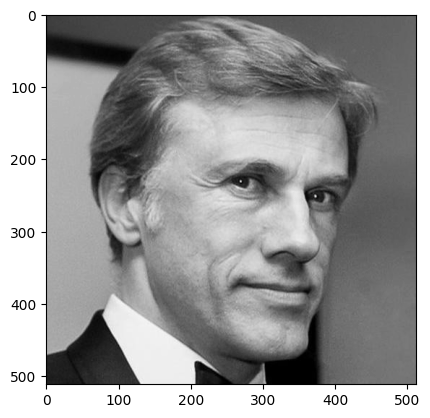

In [245]:
plt.imshow(img, cmap='gray')


# 3 Wiener Filter Design

# a)

In [4]:
    #mean = np.mean(z)
    #var = np.var(z)
    #norm_z = z - mean

    # R = np.correlate(z, z, 'full')
    # Rzz = R # / len(z) # / var

    # N = len(z)
    # R = np.empty(len(z) * 2 - 1)
    # M = len(z) * 2 - 1


    # for m in range(M):
    #     value = 0
    #     for i in range(M):
    #         try:
    #             if(i >= M - len(z) - m):
    #                 value += z[m] * z[len(z) - 1 - i]
    #         except:
    #             pass
    #     R[m] = value



    # for x in range(N):
    #     value = 0
    #     r = range(N-1, N-2 - x, -1)
    #     for y in r:
    #         R[x] += z[x] * z[y - x]



    # [0, 1, 2, 3, 4]
    #             [0, 1, 2, 3, 4]

    # [0, 1, 2, 3, 4]
    #          [0, 1, 2, 3, 4]

    # [0, 1, 2, 3, 4]
    #       [0, 1, 2, 3, 4]


In [2]:
def autocov(z):
    n = len(z)
    m = len(z) * 2 - 1
    r = np.zeros(len(z) * 2 - 1, dtype='float')

    for i in range(m):
        for j in range(m+m):
            i1 = -(m) + j + i
            i2 = -(n) + j
            if 0 <= i1 < n and 0 <= i2 < n:
                r[i] += z[i1] * z[i2]

    # for performance purpose:
    # r = np.correlate(z, z, 'full')
    
    return r

I solved this with many tries by imagining the both List, overlapping with specific indices.
With every loop, the right indices overlap and are being calculated.

# b)

In [3]:
def crosscov(z1, z2):
    # it works, but needs very long to generate a wiener filter:
    
    n = len(z1)
    m = len(z1) * 2 - 1
    r = np.zeros(len(z1) * 2 - 1, dtype='float')

    for i in range(m):
        for j in range(m+m):
            i1 = -(m) + j + i
            i2 = -(n) + j
            if 0 <= i1 < n and 0 <= i2 < n:
                r[i] += z1[i1] * z2[i2]
    
    # for performance purpose:
    # r = np.correlate(z1, z2, 'full')
    
    return r

# c)

In [52]:
a1 = [0, 1, 2, 3, 4]
a2 = [1, 2, 3, 4, 5]
print('R_a1a1: ')
print(autocov(a1))

print('R_a1a2: ')
print(crosscov(a1, a2))

R_a1a1: 
[ 0.  4. 11. 20. 30. 20. 11.  4.  0.]
R_a1a2: 
[ 0.  5. 14. 26. 40. 30. 20. 11.  4.]


# d)

Autocorrelation R_a1a1 is symmetric around its 'middle', which is due to the symmetrical calculation, as the correlating functions are identical and every calculation is made twice (except the mid-one)

# f)

In [5]:
def Rxx_Matrix(R): # makes Topelitz matrix out of correlation array

    N = R.shape[0]
    Rxx = R
    N = int((len(Rxx)+1)/2)

    T = np.zeros((N,N))
    for n in range(N):
        T[n] = np.roll(Rxx, n)[N-1:]

    # for performance purposes:
    # Rxx = scipy.linalg.toeplitz(R)
    # Rxx = np.roll(Rxx, int(N), axis = 1)

    return T

In [53]:
Rxx_Matrix(autocov(a1))

array([[30., 20., 11.,  4.,  0.],
       [20., 30., 20., 11.,  4.],
       [11., 20., 30., 20., 11.],
       [ 4., 11., 20., 30., 20.],
       [ 0.,  4., 11., 20., 30.]])

In [54]:
def wiener(x, s):
    Rxx = Rxx_Matrix(autocov(x))
    Rxs = crosscov(x, s)

    H = np.inner(np.linalg.inv(Rxx), Rxs)

    return H

# g)

In [55]:
def signal(A, f, T, fs):
    N = fs * T
    t = np.arange(0, N)
    
    return A * np.sin(2 * np.pi * f / N * t)

In [56]:
A = 1
f = 10
T = 5
fs = 100

s = signal(A, f, T, fs)

In [57]:
v = np.random.normal(0, 1000, size = fs * T) # gaussan noise

# h)

In [58]:
N = 500
x = s+v

In [59]:
Nfilt = 50
h_fil = wiener(x[:Nfilt], s[:Nfilt])

ValueError: shapes (50,50) and (99,) not aligned: 50 (dim 1) != 99 (dim 0)

In [60]:
y = np.zeros(N - Nfilt)

for n in range(N - Nfilt):
    for i in range(Nfilt):
        try:
            y[n] += h_fil[i] * x[n - i]
        except:
            pass

# i)

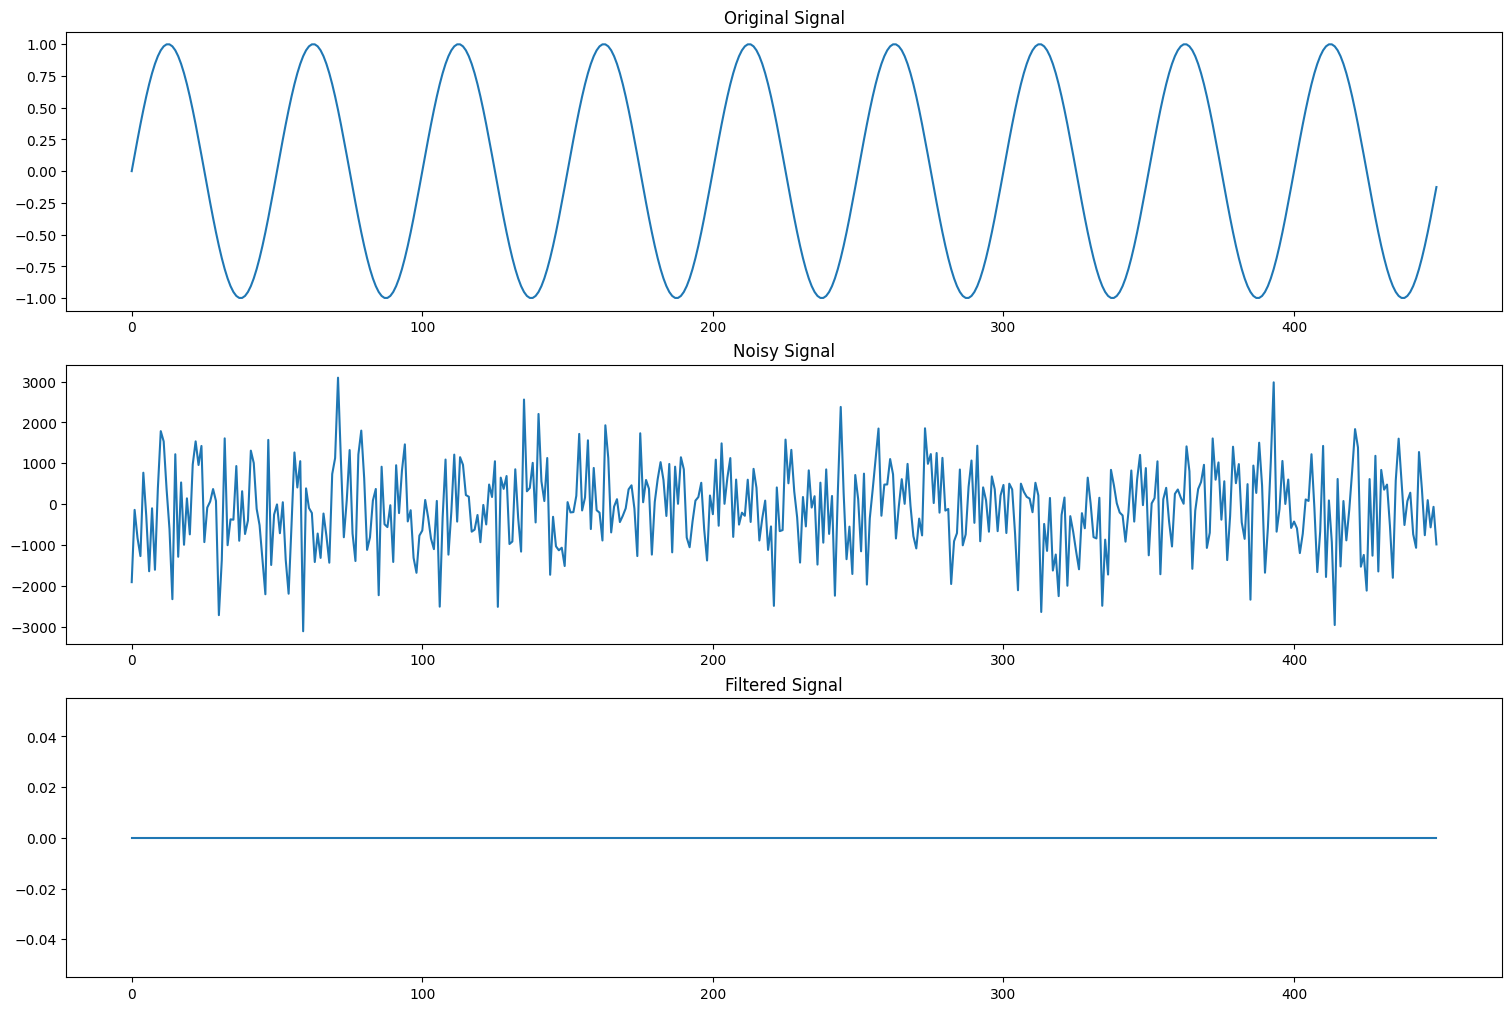

In [25]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10), constrained_layout=True)

ax[0].set_title("Original Signal")
ax[0].plot(s[Nfilt:])
ax[1].set_title("Noisy Signal")
ax[1].plot(x[Nfilt:])
ax[2].set_title("Filtered Signal")
ax[2].plot(y)


test

In [26]:
scipy.io.wavfile.write('output/test.wav', 500, s)

# j)

In [27]:
xi0 = scipy.io.wavfile.read("audio_segments/noisy_train_seg_0.wav")[1]/ (2 ** 15)
si0 = scipy.io.wavfile.read("audio_segments/original_train_seg_0.wav")[1]/ (2 ** 15)

In [28]:
wien_fil_0 = wiener(xi0, si0)

KeyboardInterrupt: 

In [ ]:
noisy_signal = scipy.io.wavfile.read("audio_segments/noisy_to_be_filtered.wav")[1]/ (2 ** 15)

In [366]:
fs_0 = np.convolve(wien_fil_0, noisy_signal)
fs_0 = fs_0/np.max(fs_0)
fs_0 *= (2 ** 15)
fs_0 = fs_0.astype(np.int16)

scipy.io.wavfile.write('output/filtered_seg_0.wav', 8000, fs_0)

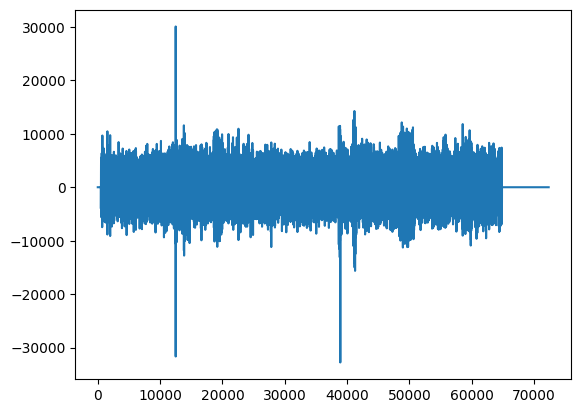

In [367]:
plt.plot(fs_0)

# k)

In [21]:
xi1 = scipy.io.wavfile.read("audio_segments/noisy_train_seg_1.wav")[1]/ (2 ** 15)
si1 = scipy.io.wavfile.read("audio_segments/original_train_seg_1.wav")[1]/ (2 ** 15)

xi2 = scipy.io.wavfile.read("audio_segments/noisy_train_seg_2.wav")[1]/ (2 ** 15)
si2 = scipy.io.wavfile.read("audio_segments/original_train_seg_2.wav")[1]/ (2 ** 15)

xi3 = scipy.io.wavfile.read("audio_segments/noisy_train_seg_3.wav")[1]/ (2 ** 15)
si3 = scipy.io.wavfile.read("audio_segments/original_train_seg_3.wav")[1]/ (2 ** 15)

xi4 = scipy.io.wavfile.read("audio_segments/noisy_train_seg_4.wav")[1]/ (2 ** 15)
si4 = scipy.io.wavfile.read("audio_segments/original_train_seg_4.wav")[1]/ (2 ** 15)

xi5 = scipy.io.wavfile.read("audio_segments/noisy_train_seg_1.wav")[1]/ (2 ** 15)
si5 = scipy.io.wavfile.read("audio_segments/original_train_seg_1.wav")[1]/ (2 ** 15)

In [424]:
wien_fil_1 = wiener(xi1, si1)

KeyboardInterrupt: 

In [369]:
wien_fil_2 = wiener(xi2, si2)

In [370]:
wien_fil_3 = wiener(xi3, si3)

In [371]:
wien_fil_3 = wiener(xi3, si3)

In [372]:
wien_fil_4 = wiener(xi4, si4)

In [373]:
wien_fil_5 = wiener(xi5, si5)

In [374]:
fs_1 = np.convolve(wien_fil_1, noisy_signal)
fs_1 = fs_1/np.max(fs_1)
fs_1 *= (2 ** 15)
fs_1 = fs_1.astype(np.int16)

scipy.io.wavfile.write('output/filtered_seg_1.wav', 8000, fs_1)

In [375]:
fs_2 = np.convolve(wien_fil_2, noisy_signal)
fs_2 = fs_2/np.max(fs_2)
fs_2 *= (2 ** 15)
fs_2 = fs_2.astype(np.int16)

scipy.io.wavfile.write('output/filtered_seg_2.wav', 8000, fs_2)

In [376]:
fs_3 = np.convolve(wien_fil_3, noisy_signal)
fs_3 = fs_3/np.max(fs_3)
fs_3 *= (2 ** 15)
fs_3 = fs_3.astype(np.int16)

scipy.io.wavfile.write('output/filtered_seg_3.wav', 8000, fs_3)

In [377]:
fs_4 = np.convolve(wien_fil_0, noisy_signal)
fs_4 = fs_4/np.max(fs_4)
fs_4 *= (2 ** 15)
fs_4 = fs_4.astype(np.int16)

scipy.io.wavfile.write('output/filtered_seg_4.wav', 8000, fs_4)

In [378]:
fs_5 = np.convolve(wien_fil_5, noisy_signal)
fs_5 = fs_5/np.max(fs_5)
fs_5 *= (2 ** 15)
fs_5 = fs_5.astype(np.int16)

scipy.io.wavfile.write('output/filtered_seg_5.wav', 8000, fs_5)

# l)

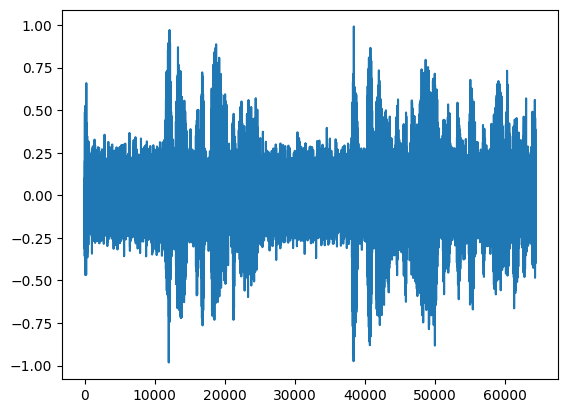

In [385]:
plt.plot(noisy_signal)

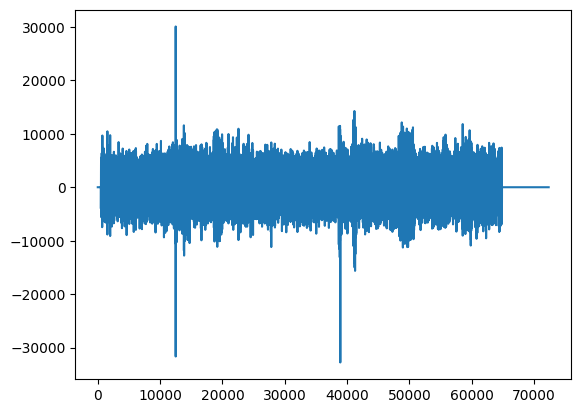

In [379]:
plt.plot(fs_0)

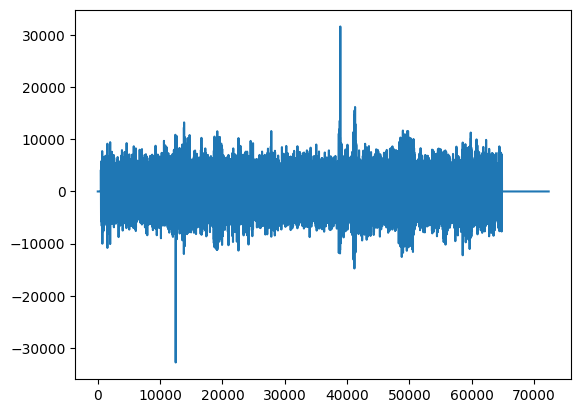

In [380]:
plt.plot(fs_1)

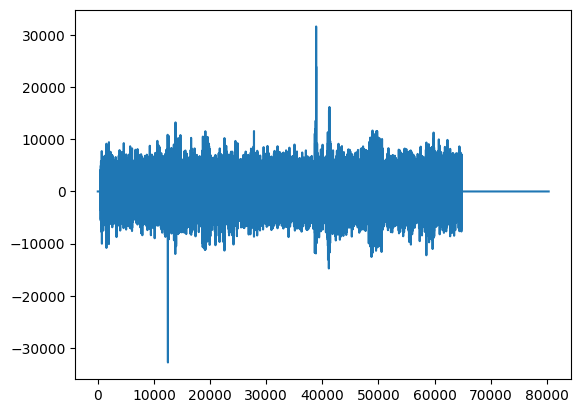

In [381]:
plt.plot(fs_2)

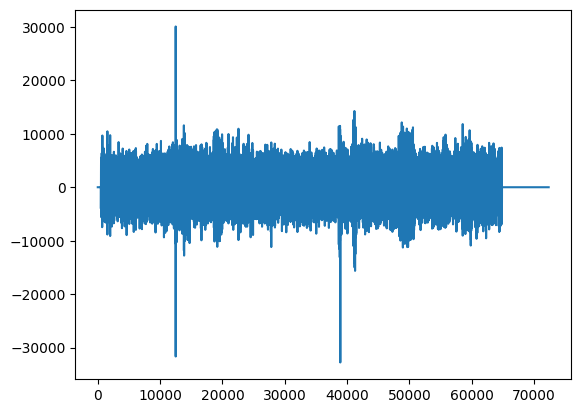

In [382]:
plt.plot(fs_3)

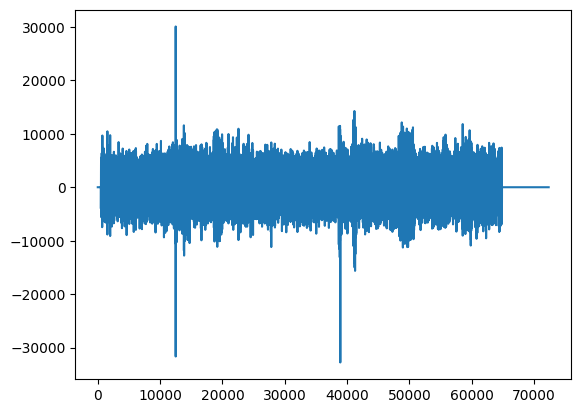

In [383]:
plt.plot(fs_4)

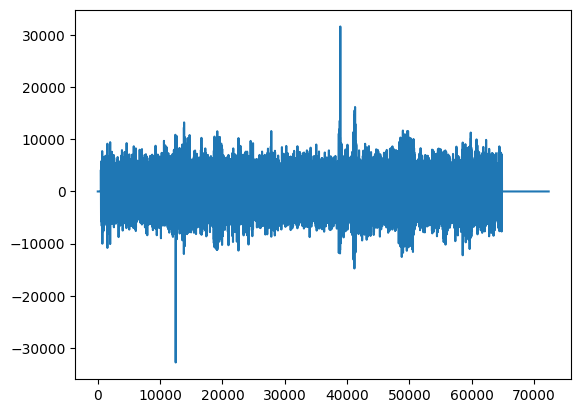

In [384]:
plt.plot(fs_5)

# m)

For the Wiener Filter, a longer Signal with solely the noise would improve the filtering quality.

# n)

YES! Because the shorter Nfilter, the less data it has of the noise that could occur.

# o)

Commonality: The calculation method: solving for h[n]           
Difference: FIR from the lecture is about filtering a specific frequency spectrum.

# q)

Because the Topelitz-Matrix is N^2 the size of the input.